# CNN para clasificación de imágenes con CIFAR10

**Dificultad:** media

En este proyecto vamos a intentar clasificar el dataset [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Para esto evaluaremos dos aproximaciones: 1) Diseñar una CNN de forma manual y entrenarla desde cero, 2) Utilizar un modelo de red pre-entrenado.

En concreto, en este proyecto aprenderemos a:

* Diseñar, entrenar y evaluar una CNN para clasificar imágenes.

* Descargar y preparar datos para entrenar y evaluar un algoritmo de machine learning.

* Detectar y solucionar el Overfitting.

* Aplicar aumentado de datos.

* Utilizar los modelos de red pre-entrenados disponibles en Keras.


El dataset CIFAR10 está compuesto por 60 mil imágenes en color con una resolución de 32x32 píxeles clasificadas en las siguientes 10 clases:


<br>

![Ejemplos CIFAR10](http://www.dlsi.ua.es/~jgallego/deepraltamira/ejemplos_cifar10.png)

<br>









## Descargar, preparar y mostrar los datos

En primer lugar vamos a descargar el dataset CIFAR10 y prepararlo para entrenar y evaluar los dos modelos de red con los que vamos a trabajar.

Dado que la normalización que aplicaremos sobre estos datos dependerá del modelo de red, nos crearemos una copia de los datos (a la que añadiremos el sufijo "\_orig"). De esta forma posteriormente podremos hacer una copia (llamando a la función "`dame_una_copia_del_dataset`") para aplicar el tipo de normalización deseada (conservando el original sin normalizar)

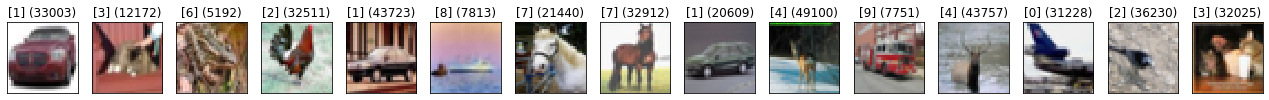

Datos para entrenamiento:
 - x_train: (50000, 32, 32, 3)
 - y_train: (50000, 1)
Datos para evaluación:
 - x_test: (10000, 32, 32, 3)
 - y_test: (10000, 1)
Rango de los datos de entrenamiento:
 - Mínimo 0.00, máximo 255.00, media 120.71
Rango de los datos de evaluación:
 - Mínimo 0.00, máximo 255.00, media 121.53


In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
from keras.datasets import cifar10
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
tf.set_random_seed(1)  # Fijamos la semilla de TF
np.random.seed(1)  # Fijamos la semilla


# ---------------------------------------
# Esta función devuelve una copia del dataset. Además nos permite indicar un
# límite para reducir el tamaño de los datos de entrenamiento.
def dame_una_copia_del_dataset(limit=-1):
  if limit <= 0:
    return x_train_orig.copy(), y_train_orig.copy(), \
           x_test_orig[:400].copy(), y_test_orig[:400].copy()
  else:
    return x_train_orig[:limit].copy(), y_train_orig[:limit].copy(), \
           x_test_orig[:400].copy(), y_test_orig[:400].copy()



# Descargamos las imágenes
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()


# Asignamos el número de etiquetas de la base de datos
NUM_LABELS = 10


# Barajamos las imágenes
x_train_orig, y_train_orig = shuffle(x_train_orig, y_train_orig, random_state=42)
x_test_orig, y_test_orig = shuffle(x_test_orig, y_test_orig, random_state=42)


# Transformamos las etiquetas a categórico (one-hot)
y_train_orig = to_categorical(y_train_orig, NUM_LABELS)
y_test_orig = to_categorical(y_test_orig, NUM_LABELS)


# Mostramos 15 imágenes aleatorias
n = 15
index = np.random.randint(len(x_train_orig), size=n)
plt.figure(figsize=(n*1.5, 1.5))
for i in np.arange(n):
    ax = plt.subplot(1,n,i+1)
    ax.set_title('{} ({})'.format(y_train_orig[index[i]],index[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(x_train_orig[index[i]])
plt.show()


# Mostramos las dimensiones de los datos
print('Datos para entrenamiento:')
print(' - x_train:', x_train_orig.shape)
print(' - y_train:', y_train_orig.shape)
print('Datos para evaluación:')
print(' - x_test:', x_test_orig.shape)
print(' - y_test:', y_test_orig.shape)


# Mostramos el rango de los datos
print('Rango de los datos de entrenamiento:')
print(' - Mínimo {:.2f}, máximo {:.2f}, media {:.2f}'.format(np.min(x_train_orig), np.max(x_train_orig), np.mean(x_train_orig)))
print('Rango de los datos de evaluación:')
print(' - Mínimo {:.2f}, máximo {:.2f}, media {:.2f}'.format(np.min(x_test_orig), np.max(x_test_orig), np.mean(x_test_orig)))

## Modelo de red 1

En primer lugar vamos a intentar clasificar este dataset utilizando una CNN definida por nosotros.

### Preparar los datos para la red

En este paso vamos perparar los datos para poder entrenar y evaluar el modelo de red. Para esto seguiremos los siguientes pasos:

1. Primero realizaremos una copia de los datos originales del dataset. Dado que este dataset es muy grande y además es bastante complejo, vamos a reducir su tamaño, quedándonos con 5000 imágenes para el entrenamiento.

2. A continuación transformaremos a decimal el formato de los datos de las imágenes y normalizaremos sus valores al rango [0,1].

3. Por último mostraremos las dimensiones de los datos obtenidos y el rango de sus valores para comprobar que todo está correcto.






In [ ]:
from keras.utils import to_categorical


# Obtenemos una copia de los datos "originales" para trabajar con ellos en el
# primer modelo de red que vamos a definir. Reducimos la cantidad de datos a
# utilizar a 5000 muestras de entrenamiento.
x_train, y_train, x_test, y_test = dame_una_copia_del_dataset(5000)


# Normalizamos los datos entre 0 y 1
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train /= 255.
x_test /= 255.


# Mostramos (de nuevo) las dimensiones de los datos
print('Datos para entrenamiento:')
print(' - x_train: {}'.format( x_train.shape ))
print(' - y_train: {}'.format( y_train.shape ))
print('Datos para evaluación:')
print(' - x_test: {}'.format( x_test.shape ))
print(' - y_test: {}'.format( y_test.shape ))


# Mostramos el rango de los datos
print('Rango de los datos de entrenamiento:')
print(' - Mínimo {:.2f}, máximo {:.2f}, media {:.2f}'.format(np.min(x_train), np.max(x_train), np.mean(x_train)))
print('Rango de los datos de evaluación:')
print(' - Mínimo {:.2f}, máximo {:.2f}, media {:.2f}'.format(np.min(x_test), np.max(x_test), np.mean(x_test)))

Datos para entrenamiento:
 - x_train: (5000, 32, 32, 3)
 - y_train: (5000, 10)
Datos para evaluación:
 - x_test: (400, 32, 32, 3)
 - y_test: (400, 10)
Rango de los datos de entrenamiento:
 - Mínimo 0.00, máximo 1.00, media 0.47
Rango de los datos de evaluación:
 - Mínimo 0.00, máximo 1.00, media 0.49


### Definir y entrenar el primer modelo de red

En este paso vamos a definir la CNN a utilizar con la siguiente estructura:

1. Una capa convolucional con 32 filtros de tamaño 5x5 y con función de activación ReLU. Recuerda que en esta capa, al ser la capa de entrada, tienes que indicar el input_shape con la forma de los datos de entrada.
2. Una capa convolucional con 32 filtros de tamaño 3x3 y con función de activación ReLU.
3. Una capa de Max Pooling de tamaño 2x2.
4. Una capa de Dropout de 0.2.
5. Una capa convolucional con 64 filtros de tamaño 5x5 y con función de activación ReLU.
6. Una capa convolucional con 64 filtros de tamaño 3x3 y con función de activación ReLU.
7. Una capa de Max Pooling de tamaño 2x2.
8. Una capa de Dropout de 0.2.
9. Una capa Flatten.
10. Una capa densa con 512 neuronas y con función de activación ReLU.
11. Una capa de Dropout de 0.2.
12. Una capa densa para la salida con 10 neuronas y con función de activación SoftMax.

Compila este modelo para que utilice la función de loss "`categorical_crossentropy`", el optimizador "`adam`" y añade además la métrica "`accuracy`".

Entrena este modelo durante 25 épocas con un batch de tamaño 32. Indica que utilice como datos de validación `x_test` e `y_test`, y guarda el resultado de este entrenamiento en la variable "`history`".

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(NUM_LABELS, activation='softmax'))


# Imprimimos un resumen de la red...
print(model1.summary())


# Compilamos la red...
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# E iniciamos el entrenamiento...
history = model1.fit(x_train, y_train,
                     batch_size=32,
                     epochs=25,
                     validation_data=(x_test, y_test),
                     shuffle=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 64)        51264     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
__________

### Mostrar curvas de aprendizaje y resultado con el conjunto de test

En este paso vamos a mostrar las curvas de aprendizaje utilizando la variable `history` que hemos guardado en el paso anterior.

Además evaluaremos el modelo de red entrenado utilizando los datos del conjunto de test.

Analiza las curvas de aprendizaje y el resultado obtenido, ¿la red está aprendiendo correctamente?

Mostramos las curvas de aprendizaje


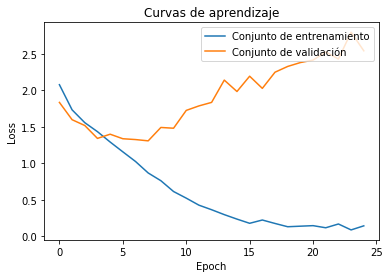

Resultado en el test set:
Test loss: 2.5422
Test accuracy: 56.25%


In [ ]:
"""
Mostramos las curvas de aprendizaje y evaluamos usando el test set
"""

# -----------------------------
def plot_learning_curves(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Curvas de aprendizaje')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Conjunto de entrenamiento', 'Conjunto de validación'], loc='upper right')
  plt.show()

print('Mostramos las curvas de aprendizaje')
plot_learning_curves(history)


# Evaluamos usando el test set
score = model1.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

### Aplicar aumentado de datos

Dado que el modelo está realizando overfitting al conjunto de entrenamiento, vamos a aplicar aumentado de datos para intentar solucionar este problema.

Para esto vamos a utilizar la clase [ImageDataGenerator de Keras](https://keras.io/preprocessing/image/#imagedatagenerator-class), aplicando las siguientes transformaciones de forma aleatoria:

*  Rotaciones en el rango [0, 20].
*  Traslaciones horizontales y verticales (0.2, es decir, un 20% del tamaño).
*  Flips horizontales.

Entrena de nuevo la red durante 25 épocas y con batch de tamaño 32 utilizando aumentado de datos. Muestra las curvas de aprendizaje y evalúa el modelo usando el test set.

Epoch 1/25
157/156 [==============================] - 5s 29ms/step - loss: 1.7642 - acc: 0.4070 - val_loss: 1.3433 - val_acc: 0.5800
Epoch 2/25
157/156 [==============================] - 5s 29ms/step - loss: 1.5020 - acc: 0.4564 - val_loss: 1.2572 - val_acc: 0.5750
Epoch 3/25
157/156 [==============================] - 5s 29ms/step - loss: 1.4252 - acc: 0.4871 - val_loss: 1.2806 - val_acc: 0.5800
Epoch 4/25
157/156 [==============================] - 5s 29ms/step - loss: 1.4141 - acc: 0.4940 - val_loss: 1.2831 - val_acc: 0.5725
Epoch 5/25
157/156 [==============================] - 5s 29ms/step - loss: 1.3715 - acc: 0.5175 - val_loss: 1.1898 - val_acc: 0.5825
Epoch 6/25
157/156 [==============================] - 5s 29ms/step - loss: 1.3519 - acc: 0.5171 - val_loss: 1.1874 - val_acc: 0.5900
Epoch 7/25
157/156 [==============================] - 5s 29ms/step - loss: 1.3229 - acc: 0.5295 - val_loss: 1.1340 - val_acc: 0.5900
Epoch 8/25
157/156 [==============================] - 5s 29ms/step - 

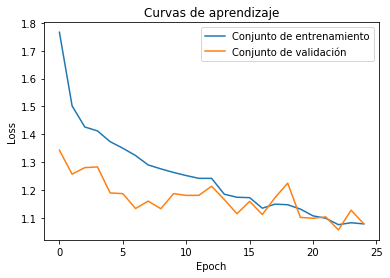

Resultado en el test set:
Test loss: 1.0792
Test accuracy: 63.50%


In [ ]:
"""
Aumentado de datos
"""
from keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

history = model1.fit_generator(datagen1.flow(x_train, y_train, batch_size=32),
                               steps_per_epoch=len(x_train) / 32,
                               epochs=25,
                               validation_data=(x_test, y_test),)

print('Mostramos las curvas de aprendizaje')
plot_learning_curves(history)


# Evaluamos usando el test set
score = model1.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))


### Mejorar el resultado obtenido

Intenta mejorar el resultado obtenido. Para esto puedes probar a:

* Aumentar el porcentaje de Dropout aplicado y/o añadir más capas de Dropout.

* Añadir Batch Normalization.

* Aumentar las transformaciones realizadas en el generador de datos.


----
----
----

## Modelo de red 2 - MobileNet v2

En esta sección vamos a tratar de clasificar este mismo dataset pero utilizando la red MobileNet v2 inicializada con los pesos aprendidos para ImageNet.



### Preparar los datos para la red

Primero vamos perparar los datos para poder entrenar y evaluar el modelo de red. Para esto seguiremos los siguientes pasos:

1. Igual que antes realizaremos una copia de los datos originales del dataset pero limitando su tamaño a 5000 imágenes de entrenamiento.

2. A continuación escalaremos el tamaño de las imágenes a 224x224 píxeles utilizando la función "`resize_images`". Este paso es necesario para poder utilizar estas imágenes con el modelo de red MobileNet v2, dado que está diseñado para utilizar este tamaño de imagen.

3. Seguidamente transformaremos a decimal el formato de los datos de las imágenes y llamaremos a la función `preprocess_input` para normalizar sus datos. En este caso llamamos a esta función para aplicar la misma normalización con la que se entrenó la red.

4. Por último mostraremos las dimensiones de los datos obtenidos y el rango de sus valores para comprobar que todo está correcto.  

In [ ]:
from keras.applications.mobilenet_v2 import preprocess_input
import cv2

def resize_images(x, size):
  newX = []
  for i in range(len(x)):
    newX.append( cv2.resize(x[i],(size, size)) )
  return np.array(newX)


# Obtenemos una copia de los datos "originales" para trabajar con ellos en el
# primer modelo de red que vamos a definir. Reducimos la cantidad de datos a
# utilizar a 5000 muestras de entrenamiento.
x_train, y_train, x_test, y_test = dame_una_copia_del_dataset(5000)


# Redimensionamos las imágenes...
x_train = resize_images(x_train, 224)
x_test = resize_images(x_test, 224)


# Transformar a formato decimal...
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)


# Normalizar los datos...
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


# Mostramos las dimensiones de los datos...
print('Datos para entrenamiento:')
print(' - x_train: {}'.format( x_train.shape ))
print(' - y_train: {}'.format( y_train.shape ))
print('Datos para evaluación:')
print(' - x_test: {}'.format( x_test.shape ))
print(' - y_test: {}'.format( y_test.shape ))


# Mostramos el rango de los datos...
print('Rango de los datos de entrenamiento:')
print(' - Mínimo {:.2f}, máximo {:.2f}, media {:.2f}'.format(np.min(x_train), np.max(x_train), np.mean(x_train)))
print('Rango de los datos de evaluación:')
print(' - Mínimo {:.2f}, máximo {:.2f}, media {:.2f}'.format(np.min(x_test), np.max(x_test), np.mean(x_test)))

Datos para entrenamiento:
 - x_train: (5000, 224, 224, 3)
 - y_train: (5000, 10)
Datos para evaluación:
 - x_test: (400, 224, 224, 3)
 - y_test: (400, 10)
Rango de los datos de entrenamiento:
 - Mínimo -1.00, máximo 1.00, media -0.06
Rango de los datos de evaluación:
 - Mínimo -1.00, máximo 1.00, media -0.02


### Definir y entrenar la red MobileNet v2

Ahora vamos a crear una instancia de la red MobileNet v2 indicando que se inicialice con los pesos pre-entrenados. Además le indicaremos que no incluya las últimas capas de la red dado que las vamos a modificar para que clasifique en el número de clases o etiquetas que tiene nuestro dataset.

Una vez definido el modelo lo compilaremos y entrenaremos. En este caso, como partimos de pesos pre-entrenados, lo que nos interesa es aprovechar esos pesos (los de las primeras capas de la red) y ajustar solamente los pesos de las últimas capas (las nuevas que hemos añadido). Por lo que, para realizar este proceso, también indicaremos que durante el entrenamiento no modifique estos pesos.

Compila este modelo para que utilice la función de loss "categorical_crossentropy", el optimizador "adam" y añade además la métrica "accuracy".

Entrena este modelo durante 20 épocas con un batch de tamaño 32. Indica que utilice como datos de validación x_test e y_test, y guarda el resultado de este entrenamiento en la variable "history".






In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D


# Creamos una instancia de la red MobileNet v2 cargando los pesos pre-entrenados
# con ImageNet e indicando que no incluya las capas finales de la red.
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))


# Añadimos las capas finales propias a este modelo de red (para esto usaremos la API funcional)
x = base_model.output
x = GlobalAveragePooling2D()(x)        # En vez de Flatten usaremos GlobalAveragePooling2D, cuyo resultado será el mismo pero necesitando muchos menos parámetros
x = Dense(512, activation='relu')(x)   # Añadimos una capa densa con 512 neuronas
x = Dropout(0.5)(x)
out = Dense(NUM_LABELS, activation='softmax')(x)   # Añadimos la capa de salida con las neuronas que necesitamos

# Creamos el modelo
model2 = Model(inputs=base_model.input, outputs=out)


# Si quieres ver un resumen de este modelo de red descomenta la siguiente línea...
#print(model2.summary())


# Indicamos que solamente se ajusten los pesos de las últimas capas (las nuevas)
# Para esto decimos que todas las capas del modelo original son "no entrenables".
for layer in base_model.layers:
    layer.trainable = False


# Compilamos la red...
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# E iniciamos el entrenamiento...
history = model2.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)



Train on 5000 samples, validate on 400 samples
Epoch 1/20
5000/5000 [==============================] - 21s 4ms/step - loss: 1.3716 - acc: 0.5312 - val_loss: 1.0859 - val_acc: 0.6625
Epoch 2/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.9636 - acc: 0.6610 - val_loss: 0.9078 - val_acc: 0.6875
Epoch 3/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.8697 - acc: 0.6930 - val_loss: 0.9729 - val_acc: 0.7100
Epoch 4/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.8068 - acc: 0.7226 - val_loss: 0.8305 - val_acc: 0.7050
Epoch 5/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.7313 - acc: 0.7462 - val_loss: 0.8965 - val_acc: 0.7125
Epoch 6/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.6820 - acc: 0.7620 - val_loss: 0.8942 - val_acc: 0.7200
Epoch 7/20
5000/5000 [==============================] - 16s 3ms/step - loss: 0.6632 - acc: 0.7668 - val_loss: 0.9140 - val_acc: 0.7100
Epoch 8/

### Mostrar las curvas de aprendizaje y evaluar con el test set

Mostramos las curvas de aprendizaje utilizando la variable "history" que hemos guardado en el paso anterior.

Además evaluaremos el modelo de red utilizando los datos del conjunto de test.

Analiza las curvas de aprendizaje y el resultado obtenido, ¿la red está aprendiendo correctamente?

Mostramos las curvas de aprendizaje


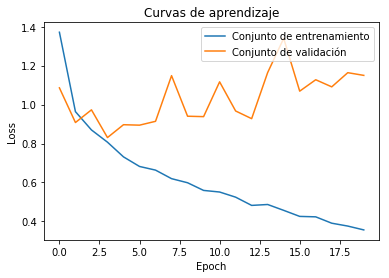

Resultado en el test set:
Test loss: 1.1500
Test accuracy: 70.00%


In [ ]:
"""
Mostramos las curvas de aprendizaje y evaluamos usando el test set
"""

print('Mostramos las curvas de aprendizaje')
plot_learning_curves(history)

# Evaluamos usando el test set
score = model2.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

### Aplicar aumentado de datos

Igual que para el primer modelo, parece que la red está realizando overfitting al conjunto de entrenamiento. Para solucionarlo vamos a aplicar aumentado de datos utilizando la clase ImageDataGenerator de Keras, aplicando las siguientes transformaciones de forma aleatoria:

* Rotaciones en el rango [0, 20].
* Traslaciones horizontales y verticales (0.2, es decir, un 20% del tamaño).
* Flips horizontales.

Entrena de nuevo la red durante 25 épocas y con batch de tamaño 32 utilizando aumentado de datos. Muestra las curvas de aprendizaje y evalúa el modelo usando el test set.

Epoch 1/25
157/156 [==============================] - 56s 360ms/step - loss: 1.1874 - acc: 0.6013 - val_loss: 0.9964 - val_acc: 0.6775
Epoch 2/25
157/156 [==============================] - 56s 357ms/step - loss: 1.1270 - acc: 0.6119 - val_loss: 1.1183 - val_acc: 0.6400
Epoch 3/25
157/156 [==============================] - 56s 359ms/step - loss: 1.0944 - acc: 0.6143 - val_loss: 0.8801 - val_acc: 0.6975
Epoch 4/25
157/156 [==============================] - 57s 362ms/step - loss: 1.0548 - acc: 0.6393 - val_loss: 0.8057 - val_acc: 0.7125
Epoch 5/25
157/156 [==============================] - 56s 359ms/step - loss: 1.0273 - acc: 0.6461 - val_loss: 0.8086 - val_acc: 0.7075
Epoch 6/25
157/156 [==============================] - 55s 353ms/step - loss: 1.0268 - acc: 0.6395 - val_loss: 0.8396 - val_acc: 0.7175
Epoch 7/25
157/156 [==============================] - 56s 359ms/step - loss: 1.0187 - acc: 0.6529 - val_loss: 1.0063 - val_acc: 0.6575
Epoch 8/25
157/156 [==============================] - 5

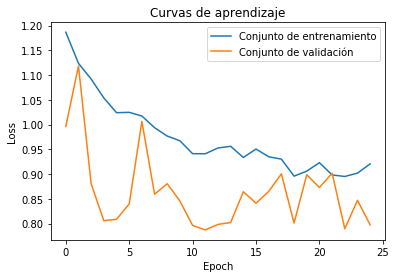

Resultado en el test set:
Test loss: 0.7973
Test accuracy: 71.75%


In [ ]:
"""
Aumentado de datos
"""

datagen2 = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

history = model2.fit_generator(datagen2.flow(x_train, y_train, batch_size=32),
                               steps_per_epoch=len(x_train) / 32,
                               epochs=25,
                               validation_data=(x_test, y_test))

print('Mostramos las curvas de aprendizaje')
plot_learning_curves(history)


# Evaluamos usando el test set
score = model2.evaluate(x_test, y_test, verbose=0)

print('Resultado en el test set:')
print('Test loss: {:0.4f}'.format(score[0]))
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

### Mejorar el resultado obtenido

Igual que antes, intenta mejorar el resultado obtenido. En este caso, al no poder modificar el modelo de red (solo podemos modificar las últimas capas), podrías probar a:

* Modifica las transformaciones realizadas en el generador de datos.

* Entrenar durante más épocas.

* Variar el tamaño de batch.

* Utilizar otro optimizador para el aprendizaje de los pesos.

* Entrenar el modelo de red completo.

* Utilizar más datos del conjunto de entrenamiento (recuerda que los habíamos reducido a 5000).